# Análise de músicas do **Spotify** 2020/2021(1/4)

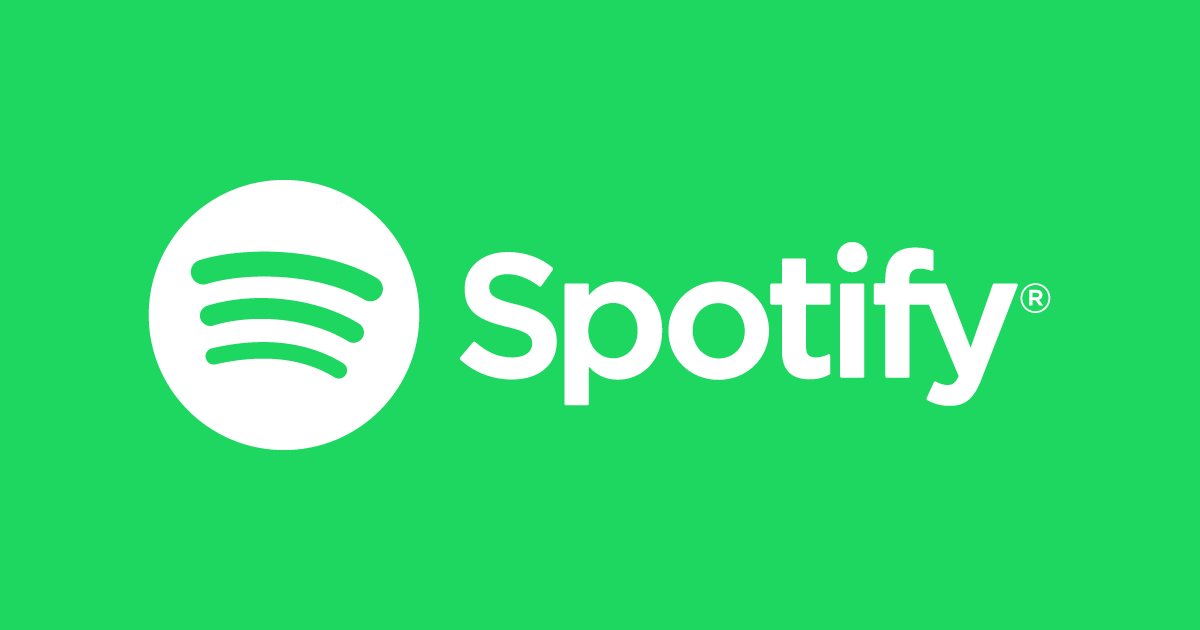

Perguntas à serem respondidas

- Quais foram os 10 artistas mais populares?
- Quais foram as 10 músicas mais populares?
- A maioria das músicas possuem conteúdo explícito?

In [43]:
# importando as bibliotecas para manipulação e visualização de dados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# criando um dataframe à partir de um arquivo csv e visualizando as 10 primeiras linhas

df = pd.read_csv("/content/drive/MyDrive/tracks.csv")

In [45]:
df.head(10)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,6,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3


In [46]:
# visualizando o nome das colunas

df.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [47]:
# criando um novo dataframe apenas com as colunas que iremos utilizar

df_principal = df[["name", "popularity", "explicit", "artists", "release_date"]]

In [48]:
# visualizando o novo dataframe

df_principal.head(10)

,name,popularity,explicit,artists,release_date
0,Carve,6,0,['Uli'],1922-02-22
1,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],1922-06-01
2,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21
3,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],1922-03-21
4,Lady of the Evening,0,0,['Dick Haymes'],1922
5,Ave Maria,0,0,['Dick Haymes'],1922
6,La Butte Rouge,0,0,['Francis Marty'],1922
7,La Java,0,0,['Mistinguett'],1922
8,Old Fashioned Girl,0,0,['Greg Fieler'],1922
9,Martín Fierro - Remasterizado,0,0,['Ignacio Corsini'],1922-03-29


In [49]:
# verificando as informações gerais

df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          586601 non-null  object
 1   popularity    586672 non-null  int64 
 2   explicit      586672 non-null  int64 
 3   artists       586672 non-null  object
 4   release_date  586672 non-null  object
dtypes: int64(2), object(3)
memory usage: 22.4+ MB


In [50]:
# procurando valores nulos

df_principal.isnull().sum()

name            71
popularity       0
explicit         0
artists          0
release_date     0
dtype: int64

In [51]:
# entendendo o que são os 71 dados faltantes da coluna "name"

df_principal.loc[df["name"].isnull()]

,name,popularity,explicit,artists,release_date
226336,NaN,28,0,[''],1994-01-01
510975,NaN,0,0,[''],1922-04-01
510976,NaN,0,0,[''],1922-04-01
510978,NaN,0,0,[''],1922-04-01
510979,NaN,0,0,[''],1922-04-01
...,...,...,...,...,...
517206,NaN,2,0,[''],1962-02-01
517215,NaN,2,0,[''],1962-02-01
520127,NaN,6,0,[''],1974-12-31
525238,NaN,26,0,[''],1998-01-05


In [52]:
# eliminando os registros faltantes pois não temos informação útil neles

df_principal.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
# verificando se os registros foram excluídos

df_principal.isnull().sum()

name            0
popularity      0
explicit        0
artists         0
release_date    0
dtype: int64

In [54]:
# formatando a nossa coluna "artists" pois contém caracteres indesejados
df_principal["artists"]

0                                 ['Uli']
1                     ['Fernando Pessoa']
2                     ['Ignacio Corsini']
3                     ['Ignacio Corsini']
4                         ['Dick Haymes']
                       ...               
586667                        ['阿YueYue']
586668                     ['ROLE MODEL']
586669                        ['FINNEAS']
586670    ['Gentle Bones', 'Clara Benin']
586671                      ['Afrosound']
Name: artists, Length: 586601, dtype: object

In [55]:
df_principal["artists"] = df_principal["artists"].apply(lambda x: x.replace("[", " "))
df_principal["artists"] = df_principal["artists"].apply(lambda x: x.replace("]", " "))
df_principal["artists"] = df_principal["artists"].apply(lambda x: x.replace("'", " "))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [56]:
# conferindo de nossa formatação deu certo

df_principal.head(10)

,name,popularity,explicit,artists,release_date
0,Carve,6,0,Uli,1922-02-22
1,Capítulo 2.16 - Banquero Anarquista,0,0,Fernando Pessoa,1922-06-01
2,Vivo para Quererte - Remasterizado,0,0,Ignacio Corsini,1922-03-21
3,El Prisionero - Remasterizado,0,0,Ignacio Corsini,1922-03-21
4,Lady of the Evening,0,0,Dick Haymes,1922
5,Ave Maria,0,0,Dick Haymes,1922
6,La Butte Rouge,0,0,Francis Marty,1922
7,La Java,0,0,Mistinguett,1922
8,Old Fashioned Girl,0,0,Greg Fieler,1922
9,Martín Fierro - Remasterizado,0,0,Ignacio Corsini,1922-03-29


In [57]:
# queremos saber as músicas que tiveram um maior nível de popularidade, por isso vamos filtrar por popularidade acima de 90

df_principal.loc[df_principal["popularity"] > 90]

,name,popularity,explicit,artists,release_date
91866,Streets,94,1,Doja Cat,2019-11-07
91867,Watermelon Sugar,92,0,Harry Styles,2019-12-13
92810,Save Your Tears,97,1,The Weeknd,2020-03-20
92811,telepatía,97,0,Kali Uchis,2020-12-04
92813,Blinding Lights,96,0,The Weeknd,2020-03-20
92814,The Business,95,0,Tiësto,2020-09-16
92816,Heartbreak Anniversary,94,0,Giveon,2020-03-27
92817,WITHOUT YOU,94,1,The Kid LAROI,2020-11-06
92819,Bandido,94,0,"Myke Towers , Juhn",2020-12-10
92821,LA NOCHE DE ANOCHE,93,0,"Bad Bunny , ROSALÍA",2020-11-27


In [58]:
# já conseguimos ter uma boa noção das músicas mais populares mas queremos somente as top 10 e saber quantas delas possuem conteúdo explícito

df_principal.sort_values(by="popularity", ascending=False).head(10)

,name,popularity,explicit,artists,release_date
93802,Peaches (feat. Daniel Caesar & Giveon),100,1,"Justin Bieber , Daniel Caesar , Giveon",2021-03-19
93803,drivers license,99,1,Olivia Rodrigo,2021-01-08
93804,Astronaut In The Ocean,98,0,Masked Wolf,2021-01-06
92811,telepatía,97,0,Kali Uchis,2020-12-04
92810,Save Your Tears,97,1,The Weeknd,2020-03-20
93805,Leave The Door Open,96,0,"Bruno Mars , Anderson .Paak , Silk Sonic",2021-03-05
92813,Blinding Lights,96,0,The Weeknd,2020-03-20
92814,The Business,95,0,Tiësto,2020-09-16
93806,Fiel,94,0,"Los Legendarios , Wisin , Jhay Cortez",2021-02-04
92819,Bandido,94,0,"Myke Towers , Juhn",2020-12-10


In [59]:
# armazenando as top 10 músicas na variável "top10"

top10= df_principal.sort_values(by="popularity", ascending=False).head(10)

In [60]:
# mudando o tema padrão do gráfico (matplotlib) para o seaborn

sns.set_theme()

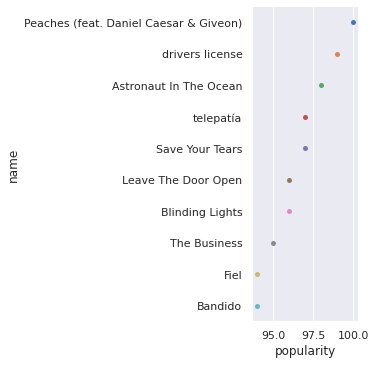

In [61]:
# visualizando graficamente o nossos resultados

sns.catplot(x="popularity",
            y="name",
            kind="swarm",
            data=top10
            )

In [73]:
# agora que sabemos as top 10 músicas e que apenas 3 contêm conteúdo explícito, precisamos saber os top 10 artistas, pois um artista pode ter mais de 1 música
# voltando a usar o dataframe principal
# filtrando os artistas pelo número de vezes que suas respectivas músicas tem popularidade maior que 90

top10_artistas = df_principal[df_principal["popularity"] > 90]["artists"].value_counts().head(10)

In [74]:
# visualizando os top 10 artistas
# já conseguimos ver quem são os artistas que possuem mais de 1 hit
# Ariana Grande e The Weeknd possuem 2 singles com alta popularidade

top10_artistas

  Ariana Grande                                   2
  The Weeknd                                      2
  Cardi B                                         1
  Bad Bunny ,  Jhay Cortez                        1
  Drake                                           1
  Nathan Evans ,  220 KID ,  Billen Ted           1
  Travis Scott ,  HVME                            1
  ATB ,  Topic ,  A7S                             1
  KAROL G                                         1
  Bruno Mars ,  Anderson .Paak ,  Silk Sonic      1
Name: artists, dtype: int64

In [83]:
# vamos tranformar nossa variável top10_artistas em um novo dataframe e zerar os índices para que possamos plotar gráficos

top10_artistasfinal = pd.DataFrame(top10_artistas)
top10_artistasfinal.reset_index(inplace=True)
top10_artistasfinal

,index,artists
0,Ariana Grande,2
1,The Weeknd,2
2,Cardi B,1
3,"Bad Bunny , Jhay Cortez",1
4,Drake,1
5,"Nathan Evans , 220 KID , Billen Ted",1
6,"Travis Scott , HVME",1
7,"ATB , Topic , A7S",1
8,KAROL G,1
9,"Bruno Mars , Anderson .Paak , Silk Sonic",1


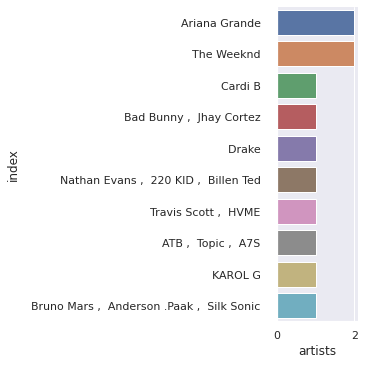

In [89]:
# plotando um gráfico de barras para melhor visualização

sns.catplot(y="index", x="artists", kind="bar", data=top10_artistasfinal)